In [5]:
# ライブラリのインポート
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.datasets import load_boston

In [6]:
# 住宅価格データセットのダウンロード
#boston = load_boston()
# 特徴量に平均部屋数(RM)を選択し20行に絞り込み
#X = boston.data[:20,[5]]
# 正解に住宅価格(MDEV)を設定し20行に絞り込み
#y = boston.target[:20]
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = np.ravel(raw_df.values[1::2, 2])
X = X[:20, 5].reshape(-1, 1)
y = y[:20]

# 特徴量と正解を訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('X_trainの形状：',X_train.shape,' y_trainの形状：',y_train.shape,' X_testの形状：',X_test.shape,' y_testの形状：',y_test.shape)

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\treme\AppData\Local\Temp\ipykernel_14896\1227426834.py:9: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


X_trainの形状： (16, 1)  y_trainの形状： (16, 1)  X_testの形状： (4, 1)  y_testの形状： (4, 1)


In [7]:
# 特徴量の標準化
sc = StandardScaler()
# 訓練データを変換器で標準化
X_train_std = sc.fit_transform(X_train)
# テストデータを作成した変換器で標準化
X_test_std = sc.transform(X_test)

In [8]:
# LinearRegressionとSVRをモデルを作成
model = LinearRegression()
model2 = SVR(kernel='linear', C=10000.0, epsilon=4.0)

# モデルの訓練
model.fit(X_train_std, y_train)
model2.fit(X_train_std, y_train)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10000.0, epsilon=4.0, kernel='linear')

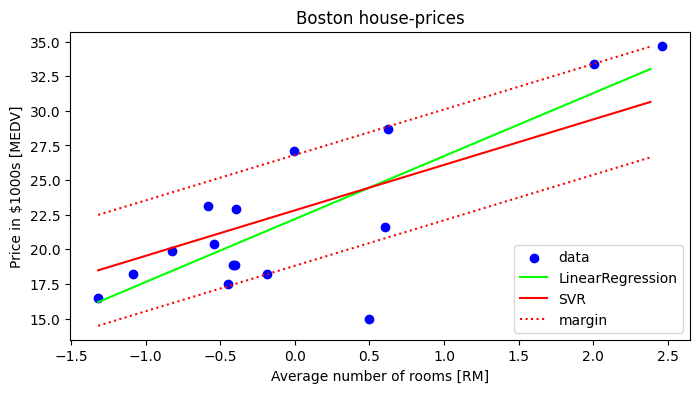

In [9]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# 訓練データの最小値から最大値まで0.1刻みのX_pltを作成
X_plt = np.arange(X_train_std.min(), X_train_std.max(), 0.1)[:, np.newaxis]
# 線形回帰のプロット
y_plt_pred = model.predict(X_plt)
# SVRのプロット
y_plt_pred2 = model2.predict(X_plt)

# 部屋数と住宅価格の散布図とプロット
plt.scatter(X_train_std, y_train, color='blue', label='data')
plt.plot(X_plt, y_plt_pred, color='lime', linestyle='-', label='LinearRegression')
plt.plot(X_plt, y_plt_pred2 ,color='red', linestyle='-', label='SVR')
plt.plot(X_plt, y_plt_pred2 + model2.epsilon, color='red', linestyle=':', label='margin')
plt.plot(X_plt, y_plt_pred2 - model2.epsilon, color='red', linestyle=':')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('Average number of rooms [RM]')
plt.title('Boston house-prices')
plt.legend(loc='lower right')

plt.show()

In [10]:
# サポートベクトルの特徴量X
model2.support_vectors_

array([[ 2.00461579],
       [ 0.49545815],
       [-0.00273398],
       [-0.1874296 ]])

In [11]:
# サポートベクトルの特徴量Xのインデックス
model2.support_

array([2, 3, 6, 8])

In [12]:
# 訓練データ、テストデータの住宅価格を予測
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

# MSEの計算
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 11.72, test: 14.94


In [13]:
# 訓練データ、テストデータの住宅価格を予測
y_train_pred2 = model2.predict(X_train_std)
y_test_pred2 = model2.predict(X_test_std)

# MSEの計算
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred2),
        mean_squared_error(y_test, y_test_pred2)))

MSE train: 13.71, test: 11.64
